In [22]:
import numpy as np
import jax.numpy as jnp
from numba import njit
import bilby

In [ ]:
@njit
def linear_interpolator(xnew, coefficients, x, bounds_error=False, fill_value=None):
    """
    """

    idx_max = len(x)-1
    if bounds_error:
        if (xnew < x[0]) or (xnew > x[idx_max]):
            raise ValueError("Chosen x values out of bound")

    # Handling extrapolation
    i = np.searchsorted(x, xnew) - 1 
    idx1 = xnew <= x[0]
    i[idx1] = 0
    idx2 = xnew > x[idx_max]
    i[idx2] = idx_max - 1

    # Calculate the relative position within the interval
    dx = xnew - x[i]

    # Calculate the interpolated value
    # linear polynomial: a + b*dx 
    const, slope = coefficients[i].T
    ynew = const + slope*dx

    if fill_value is not None:
        ynew[idx1] = fill_value
        ynew[idx2] = fill_value

    return ynew

@njit
def coefficients_generator_linear(x, y):
    """
    """

    lenx = len(x)
    x2 = x[1:lenx]
    x1 = x[0:lenx-1]
    y2 = y[1:lenx]
    y1 = y[0:lenx-1]

    slope = (y2-y1)/(x2-x1)
    const = y1

    return const,slope

In [80]:
x_, y_

(array([1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 array([2.71828183e+00, 7.38905610e+00, 2.00855369e+01, 5.45981500e+01,
        1.48413159e+02, 4.03428793e+02, 1.09663316e+03, 2.98095799e+03,
        8.10308393e+03]))

In [75]:
np.searchsorted(x_, np.array([0,1])) - 1

array([-1, -1])

In [76]:
np.array([0,1])>x_[0]

array([False, False])

In [126]:
coeff = np.array(coefficients_generator_linear(x_, y_)).T

In [193]:
x_new = np.random.uniform(0,11,10)
y_new = cubic_spline_interpolator(x_new, coeff, x_, bounds_error=False, fill_value=None)

In [188]:
xnew=np.random.uniform(0,15,10)
coefficients=coeff
x=x_
bounds_error=False 
fill_value=0.0

idx_max = len(x)-1
if bounds_error:
    if (xnew < x[0]) or (xnew > x[idx_max]):
        raise ValueError("Chosen x values out of bound")

# Handling extrapolation
i = np.searchsorted(x, xnew) - 1 
idx1 = xnew <= x[0]
i[idx1] = 0
idx2 = xnew > x[idx_max]
i[idx2] = idx_max - 1

# Calculate the relative position within the interval
dx = xnew - x[i]

# Calculate the interpolated value
# linear polynomial: a + b*dx 
const, slope = coefficients[i].T
ynew = const + slope*dx

if fill_value is not None:
    ynew[idx1] = fill_value
    ynew[idx2] = fill_value


In [189]:
ynew

array([   0.        ,    0.        ,    4.95501613,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        , 1035.45758448])

[]

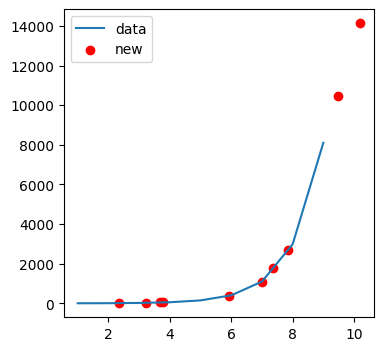

In [194]:
# test 
x_ = np.arange(1.0,10.0,1)
y_ = np.exp(x_)

# plot
import matplotlib.pyplot as plt

plt.figure(figsize=(4,4))
plt.plot(x_, y_, label='data')
plt.scatter(x_new, y_new, label='new', color='r')
plt.legend()
plt.plot()

In [ ]:
signal1 = np.array()

In [ ]:
def noise_weighted_inner_product(
    signal1, signal2, psd, duration,
):
    """
    Noise weighted inner product of two time series data sets.

    Parameters
    ----------
    signal1: `numpy.ndarray` or `float`
        First series data set.
    signal2: `numpy.ndarray` or `float`
        Second series data set.
    psd: `numpy.ndarray` or `float`
        Power spectral density of the detector.
    duration: `float`
        Duration of the data.
    """

    nwip_arr = np.conj(signal1) * signal2 / psd
    return 4 / duration * np.sum(nwip_arr)